In [259]:
import pandas as pd
import matplotlib.pyplot as plt

In [260]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown system")

In [261]:
df = pd.read_csv('correlation analysis.csv', engine = 'python')

In [278]:
df

,자격증,DA,데이터 개발자,데이터 엔지니어,데이터 분석가,DBA,데이터 사이언티스트,데이터 컨설턴트,데이터 기획/마케터
0,데이터아키텍쳐전문가(DAP),0.738035,0.717233,0.639505,0.755782,0.689856,0.688111,0.619113,0.603499
1,데이터아키텍쳐준전문가(DAsP),0.379039,0.361748,0.274539,0.422508,0.316999,0.325537,0.256258,0.246971
2,SQL전문가(SQLP),0.861501,0.840690,0.801002,0.834965,0.841397,0.856044,0.777941,0.760685
3,SQL개발자(SQLD),0.601651,0.581404,0.522586,0.602956,0.561796,0.585067,0.499252,0.486296
4,데이터분석전문가(ADP),0.165059,0.152026,0.047341,0.241226,0.089175,0.084444,0.034732,0.029370
5,데이터분석준전문가(ADsP),0.620756,0.603616,0.497764,0.676549,0.553504,0.533849,0.481866,0.468437
6,정보처리기사,0.809996,0.791197,0.671678,0.876358,0.739505,0.686997,0.660436,0.643083


In [263]:
words = ['설계','관리','데이터베이스','품질','모델링','개발자','분석','과학','관리','개발','활용','제공','관리','언어','SQL','python','다양','DB','서버','분석','머신러닝','분류','수학']

In [264]:
df[df['DA'] == df['DA'].max()][['자격증']]

,자격증
2,SQL전문가(SQLP)


In [265]:
words
global da, datadev, dataeng, dataanal, dba , datascien
da, datadev, dataeng, dataanal, dba , datascien = 0, 0, 0, 0, 0, 0

In [266]:
da_dic = {'설계':0.25, '관리':0.22, '데이터베이스':0.2, '품질':0.17, '모델링':0.14}
datadev_dic = {'데이터베이스':0.45, '개발자':0.27, '분석':0.11, '과학':0.08,'관리':0.08}
dataeng_dic = {'개발':0.21, '분석':0.21, '활용':0.2, '제공':0.18, '가공':0.17}
dataanal_dic = {'분석':0.39, '언어':0.34, 'SQL':0.1, 'python':0.08, '다양':0.08}
dba_dic = {'데이터베이스':0.34, 'DB':0.2, '관리':0.16, '서버':0.15, '개발':0.14}
datascien_dic = {'분석':0.29, '머신러닝':0.27, '분류':0.15, '활용':0.15, '수학':0.11}

In [267]:
def score(word):
    global da, datadev, dataeng, dataanal, dba , datascien
    try:  
        da += da_dic[word]
    except:
        pass
    try:
        datadev += datadev_dic[word]
    except:
        pass    
    try:
        dataeng += dataeng_dic[word]
    except:
        pass    
    try:
        dataanal += dataanal_dic[word]
    except:
        pass    
    try:
        dba += dba_dic[word]
    except:
        pass    
    try:
        datascien += datascien_dic[word]
    except:
        pass

In [268]:
print(words)

['설계', '관리', '데이터베이스', '품질', '모델링', '개발자', '분석', '과학', '관리', '개발', '활용', '제공', '관리', '언어', 'SQL', 'python', '다양', 'DB', '서버', '분석', '머신러닝', '분류', '수학']


In [269]:
score('python')
score('SQL')
score('관리')
score('머신러닝')
score('설계')

In [270]:
your_job = max(da, datadev, dataeng, dataanal, dba , datascien)
if your_job == da:
    job = 'DA'
elif your_job == datadev:
    job = '데이터 개발자'
elif your_job == dataeng:
    job = '데이터 엔지니어'
elif your_job == dataanal:
    job = '데이터 분석가'
elif your_job == dba:
    job = 'DBA'
elif your_job == datascien:
    job = '데이터 사이언티스트'
else:
    print('niami')

In [271]:
print('당신의 추천 직업은...' + job)

당신의 추천 직업은...DA


In [272]:
df2 = df.sort_values(by=job, ascending=False).groupby('자격증').head()[['자격증', job]]
df2

,자격증,DA
2,SQL전문가(SQLP),0.861501
6,정보처리기사,0.809996
0,데이터아키텍쳐전문가(DAP),0.738035
5,데이터분석준전문가(ADsP),0.620756
3,SQL개발자(SQLD),0.601651
1,데이터아키텍쳐준전문가(DAsP),0.379039
4,데이터분석전문가(ADP),0.165059


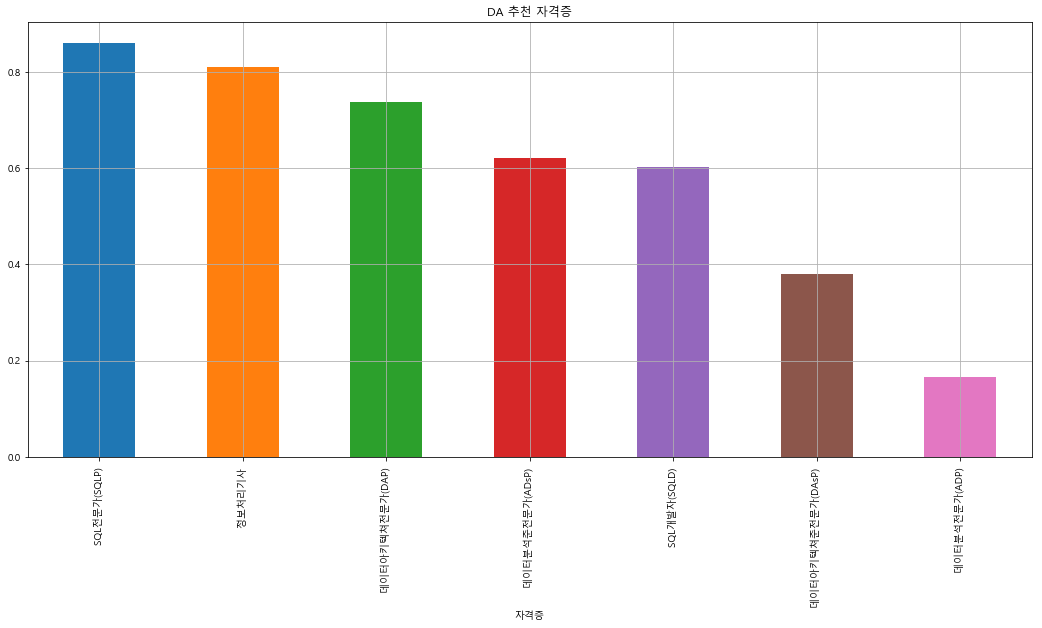

In [277]:
df2.index =  df2['자격증']
df2[job].plot(kind = 'bar', grid=True, figsize=(18,8), title = job + ' 추천 자격증')
plt.show()